In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1853,2020-10-04,United Kingdom,472519.0,480017.0,42341.0,42317.0,-7498.0,24.0
1854,2020-10-04,Germany,299192.0,299237.0,9538.0,9529.0,-45.0,9.0
1855,2020-10-04,Iran,467659.0,468119.0,26785.0,26746.0,-460.0,39.0
1856,2020-10-04,Turkey,322659.0,323014.0,8381.0,8384.0,-355.0,-3.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  11822.56027987083
RMSE =  42220.86745687595


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  320.216361679225
RMSE =  807.8168042543664


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  87707.58857142857
RMSE =  133805.0112456822
-- World performances for deaths --
MAE =  1935.142857142857
RMSE =  2351.2595092843326


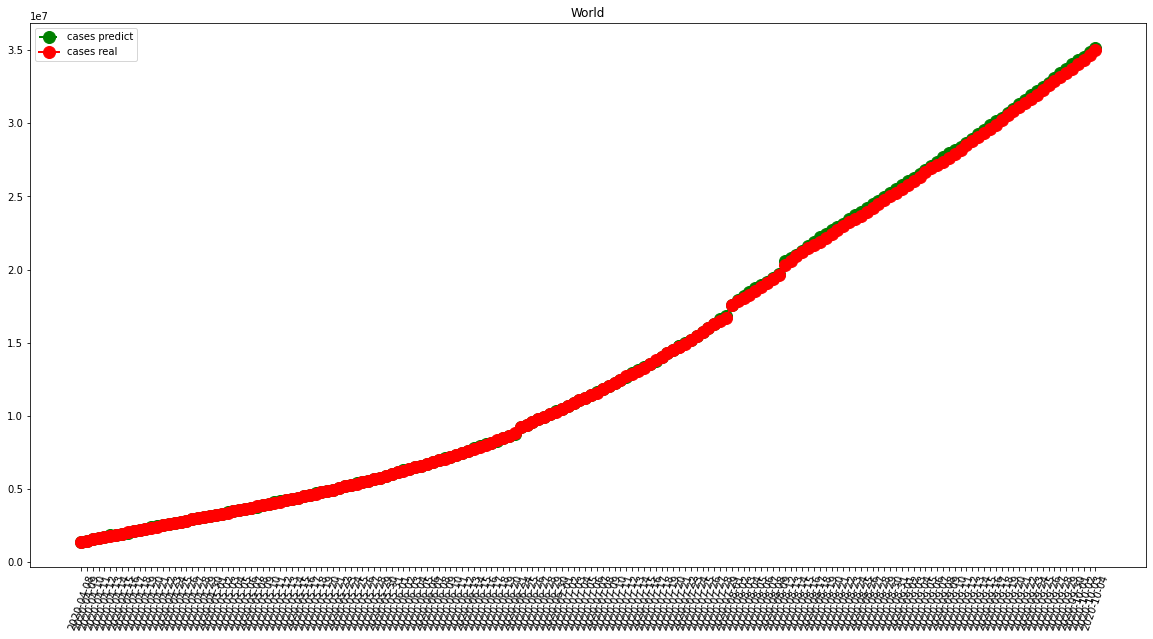

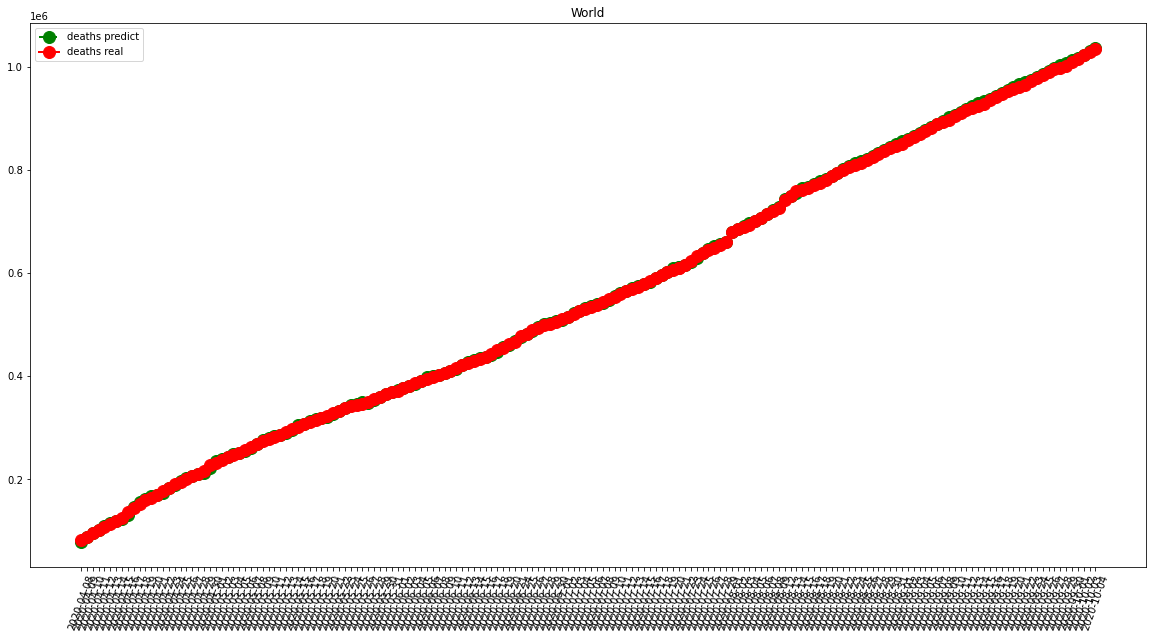

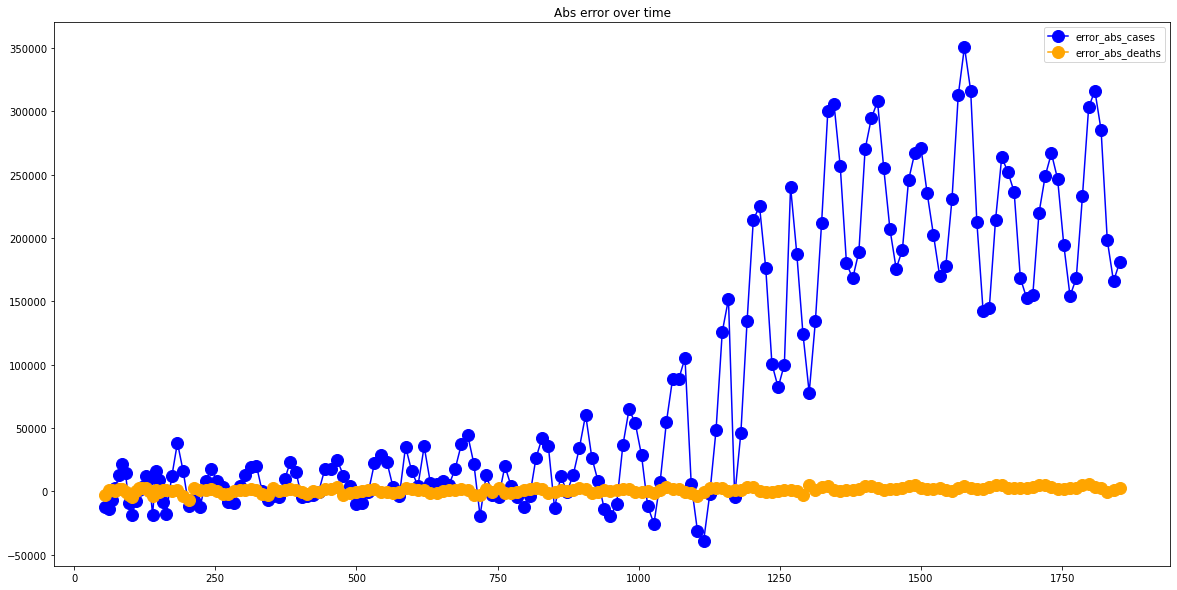

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1395.0972972972972
RMSE =  2185.3856917307803
-- France performances for deaths --
MAE =  106.97837837837838
RMSE =  247.41396539053787


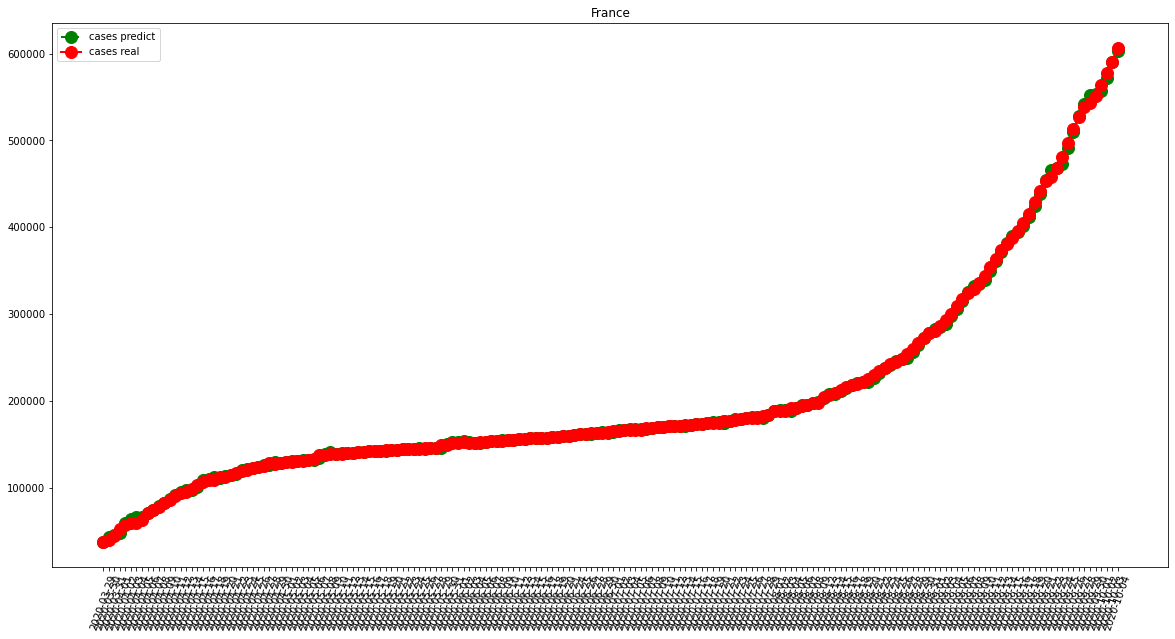

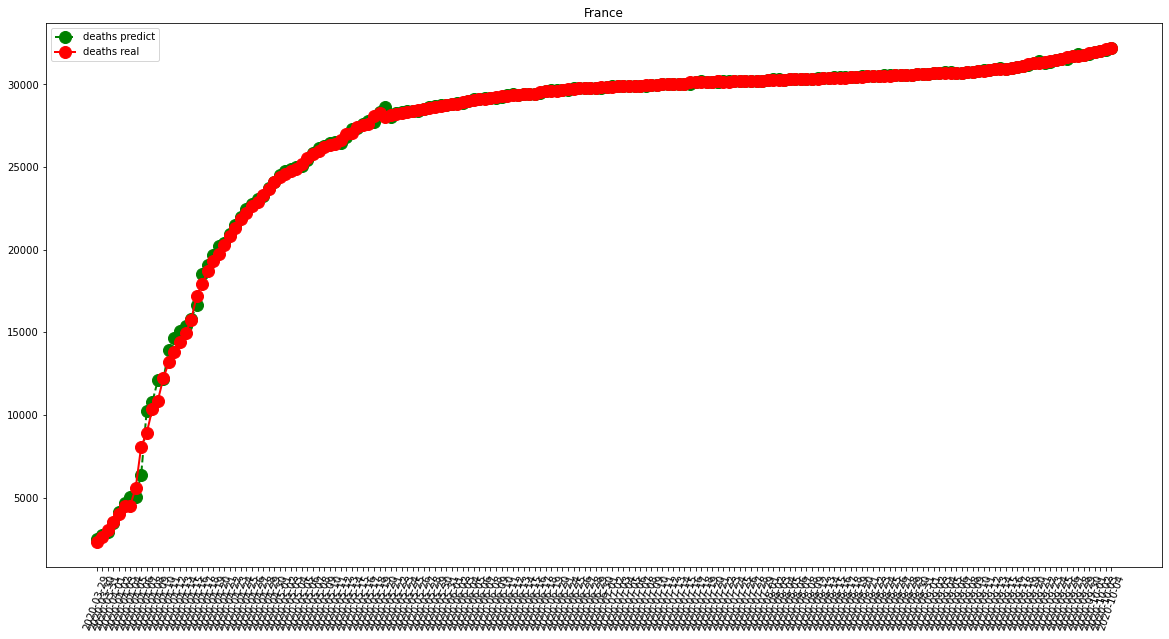

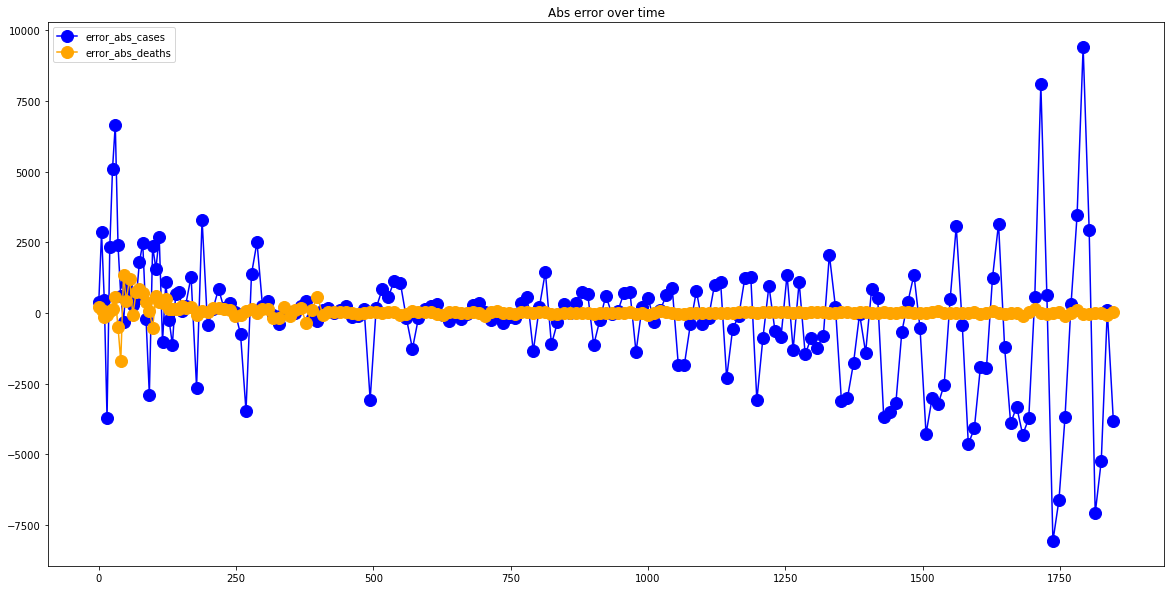

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  313.74594594594595
RMSE =  454.63418617966164
-- Italy performances for deaths --
MAE =  62.972972972972975
RMSE =  218.35384127603527


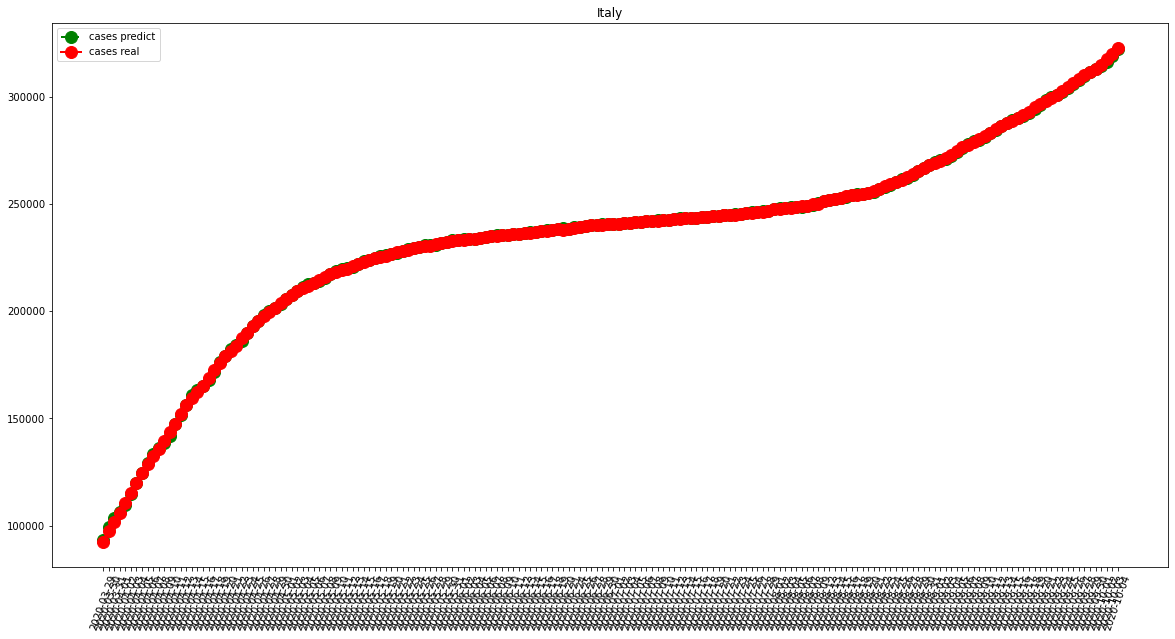

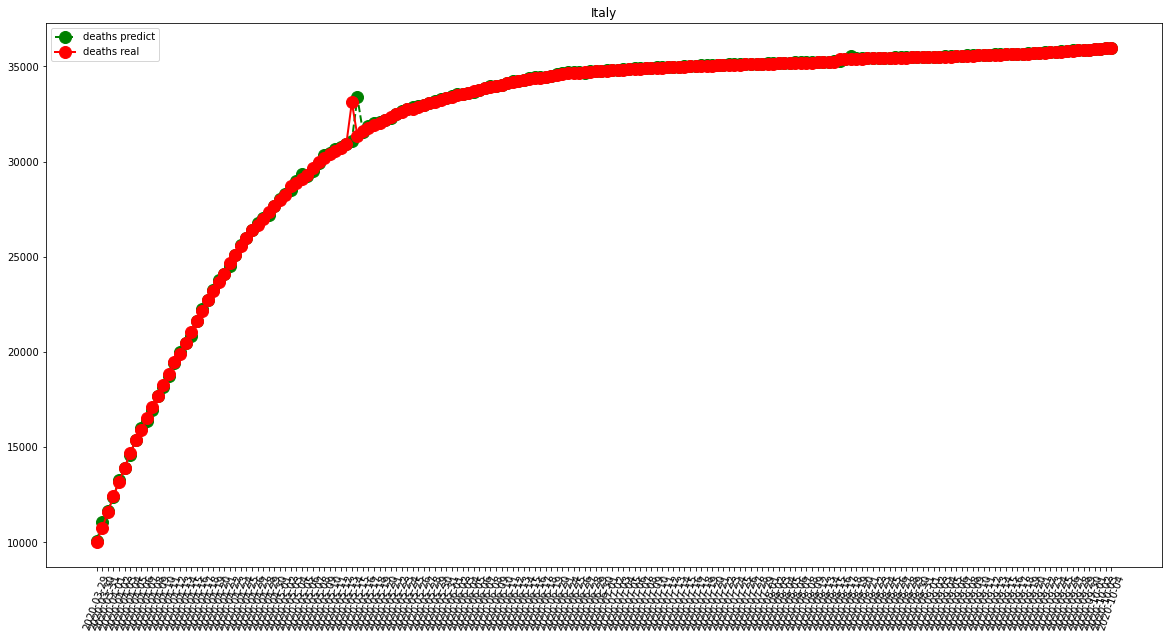

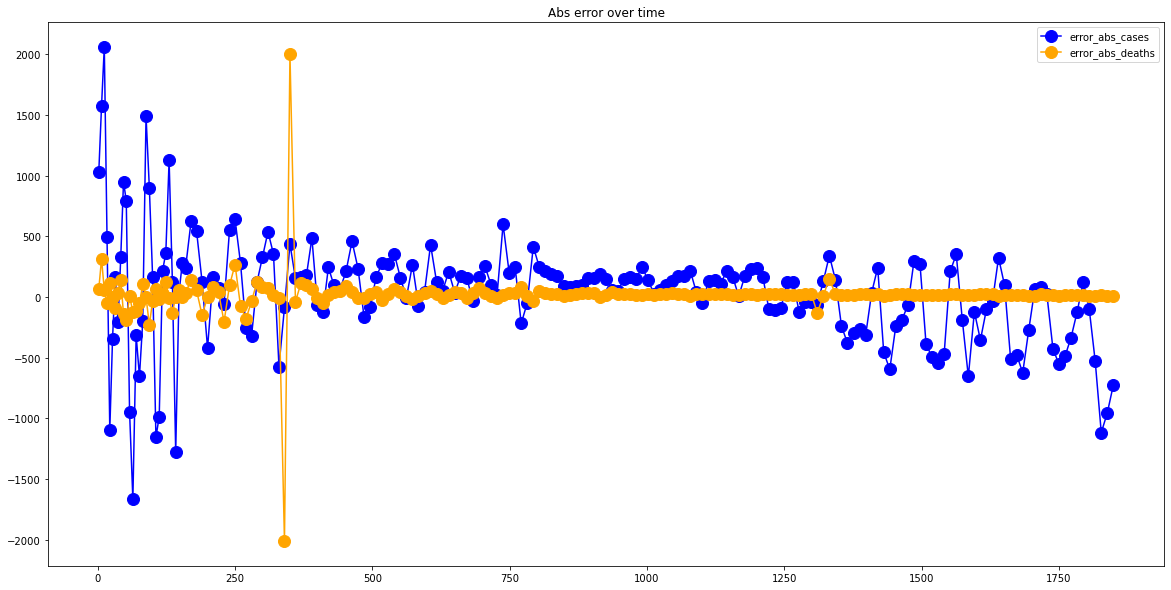

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2910.718918918919
RMSE =  5656.165120014166
-- Spain performances for deaths --
MAE =  118.52432432432433
RMSE =  301.82197186868734


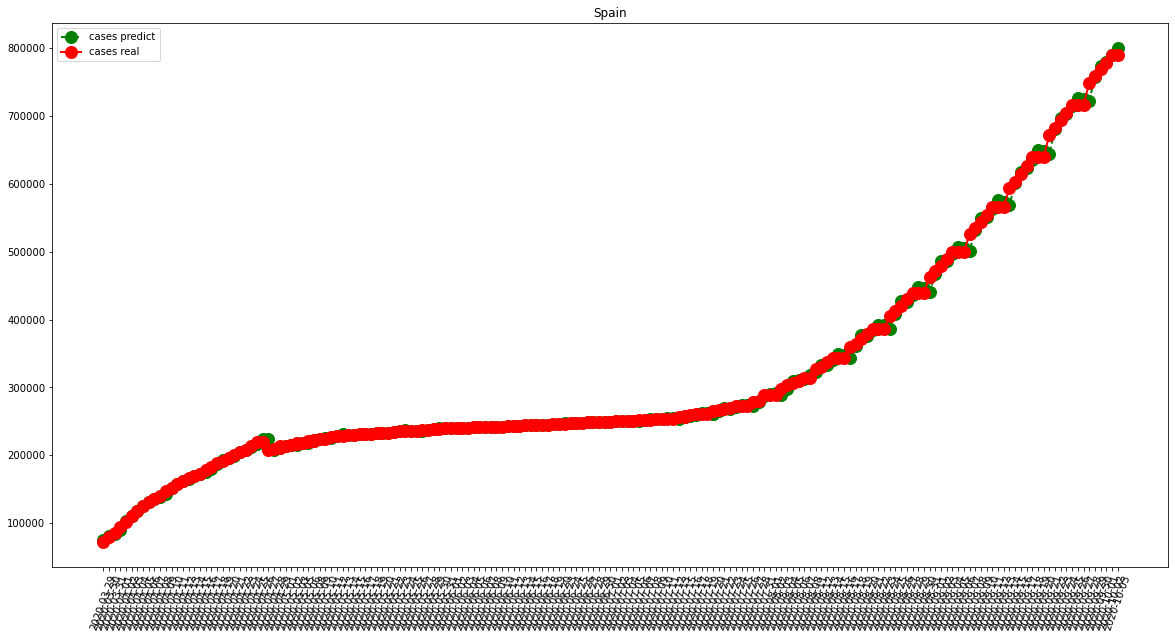

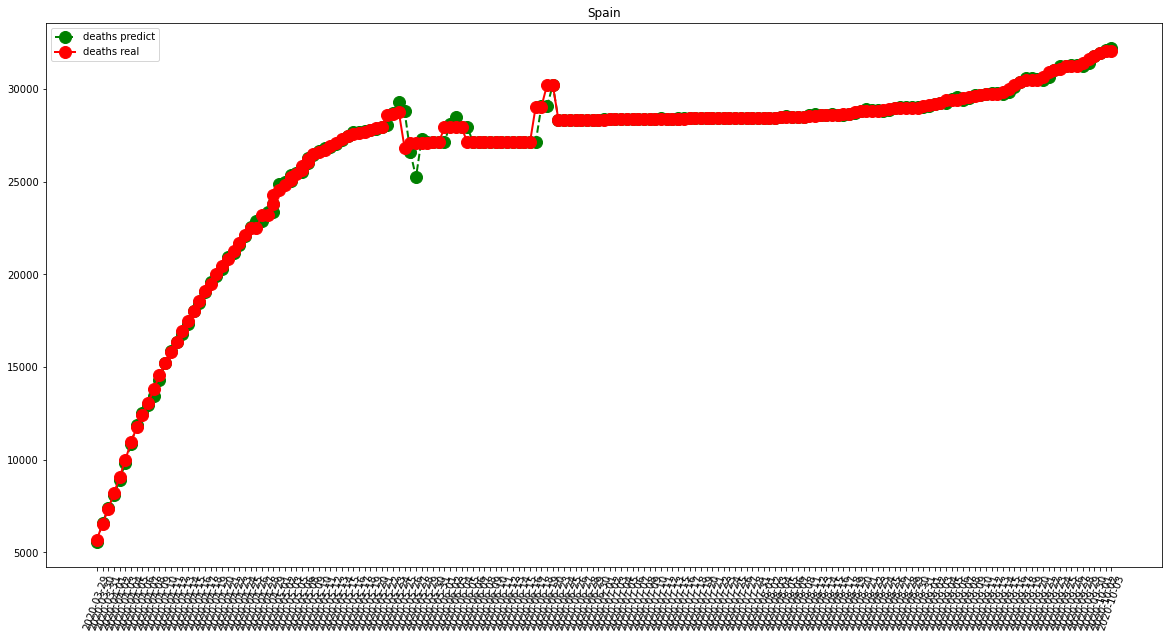

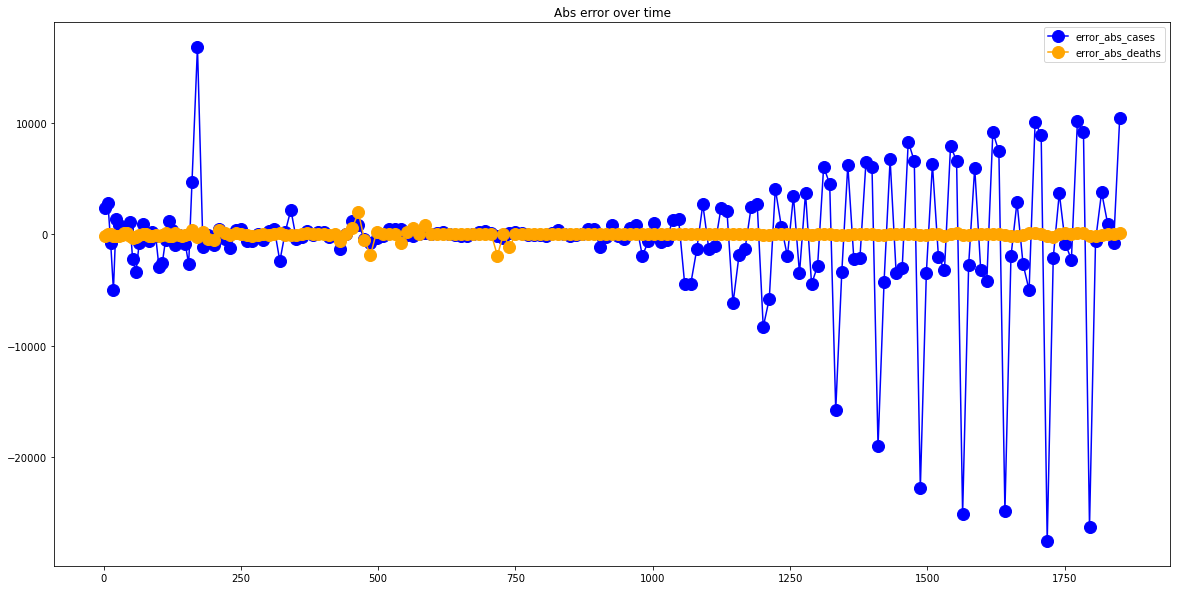

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  16572.83243243243
RMSE =  23751.33746902619
-- United States performances for deaths --
MAE =  474.66486486486485
RMSE =  662.6433919272604


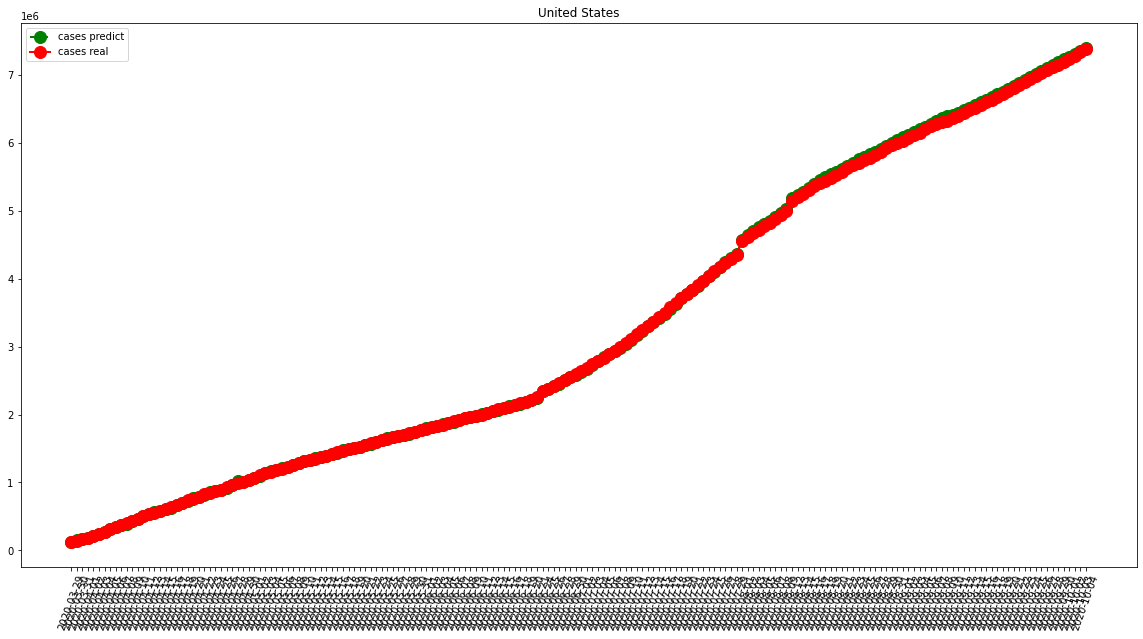

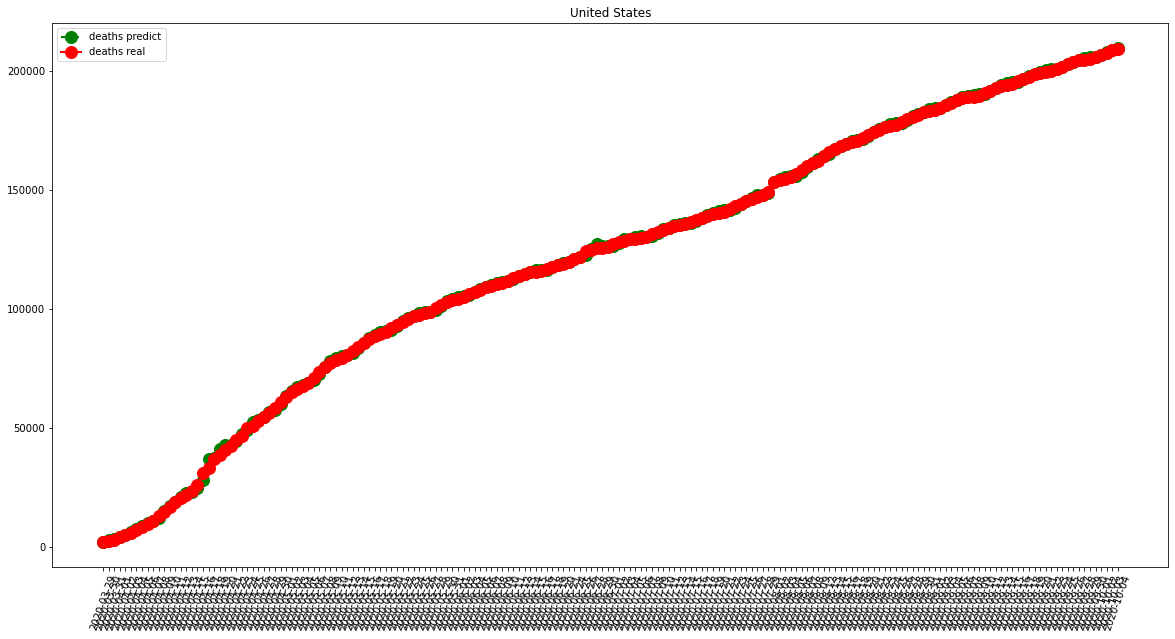

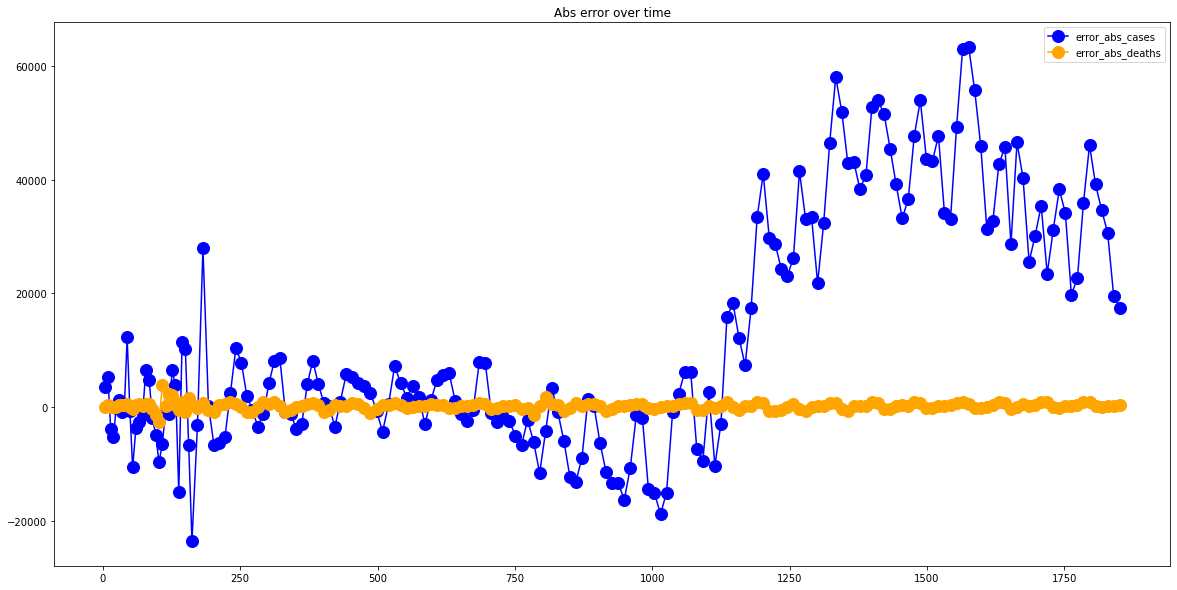

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  58.25945945945946
RMSE =  94.81253195762793
-- China performances for deaths --
MAE =  23.4
RMSE =  115.4650994421656


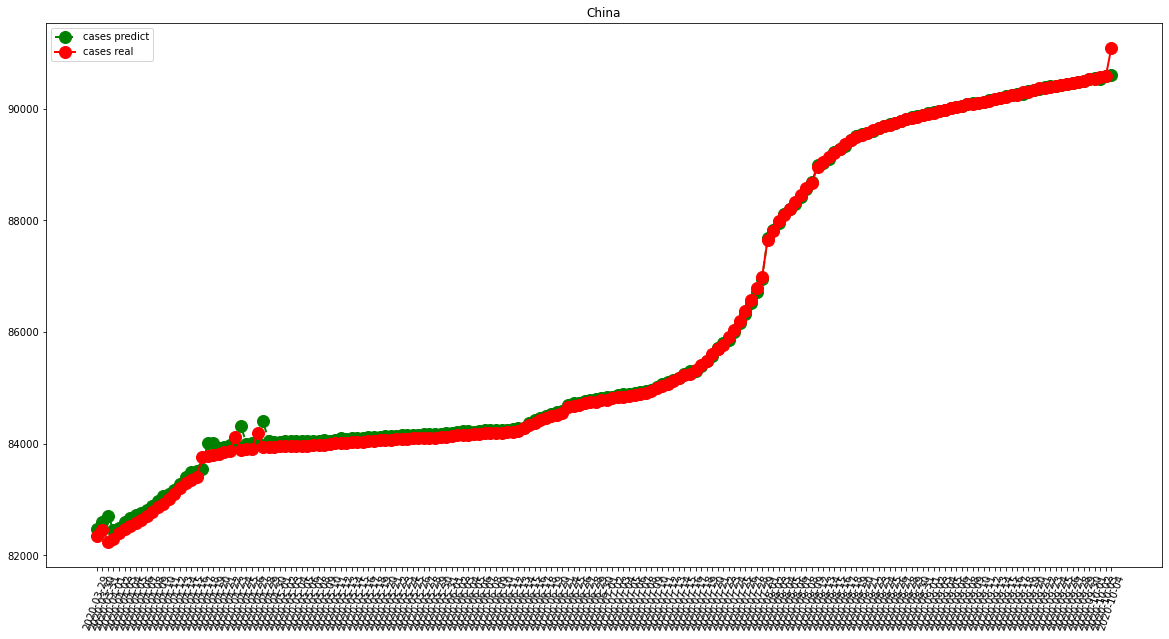

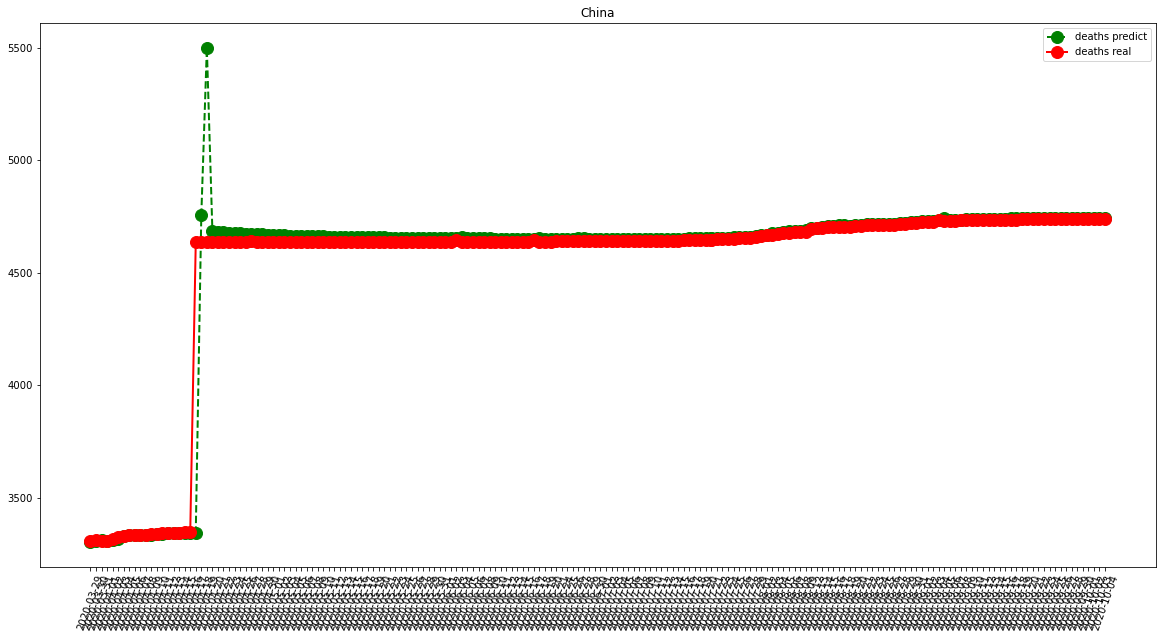

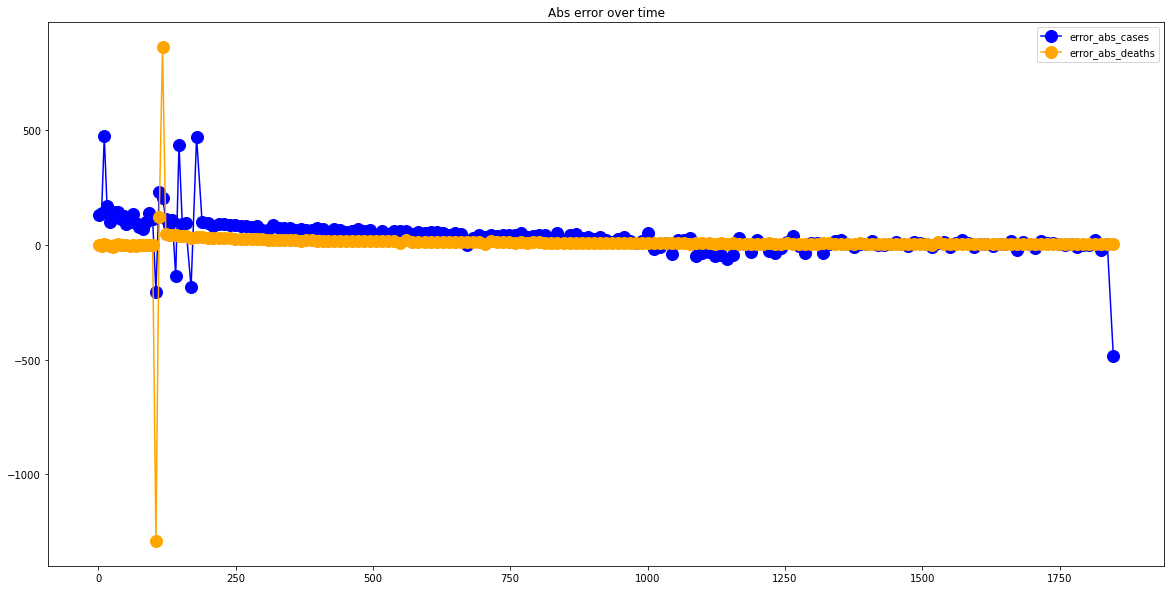

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1135.6305732484077
RMSE =  3463.700019005117
-- United Kingdom performances for deaths --
MAE =  198.44585987261146
RMSE =  681.2341460786001


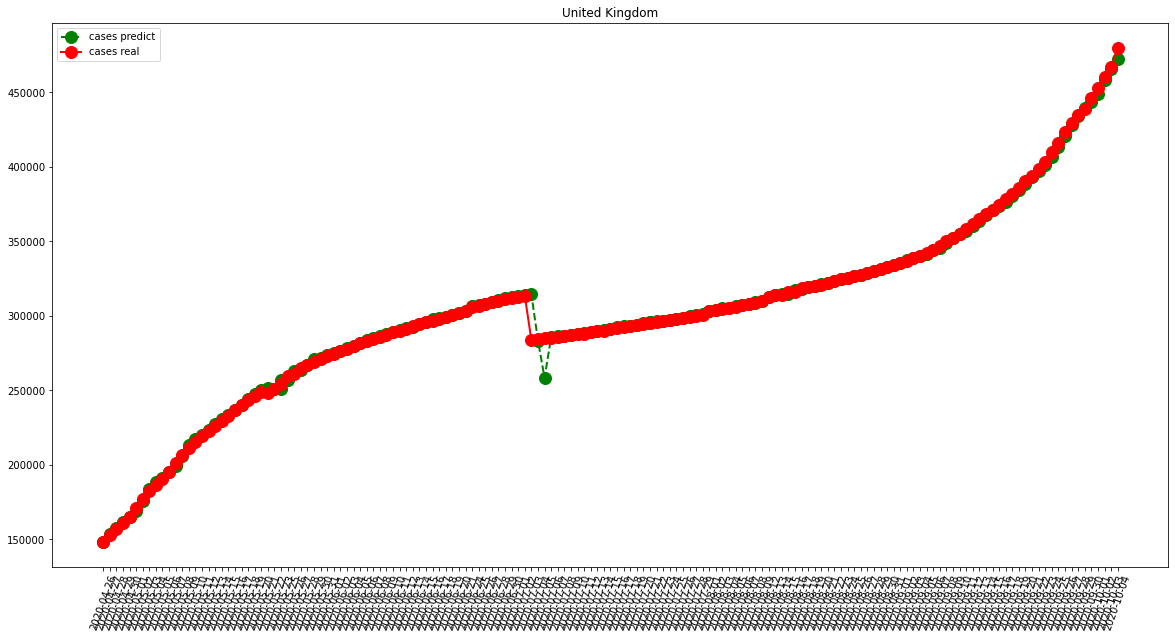

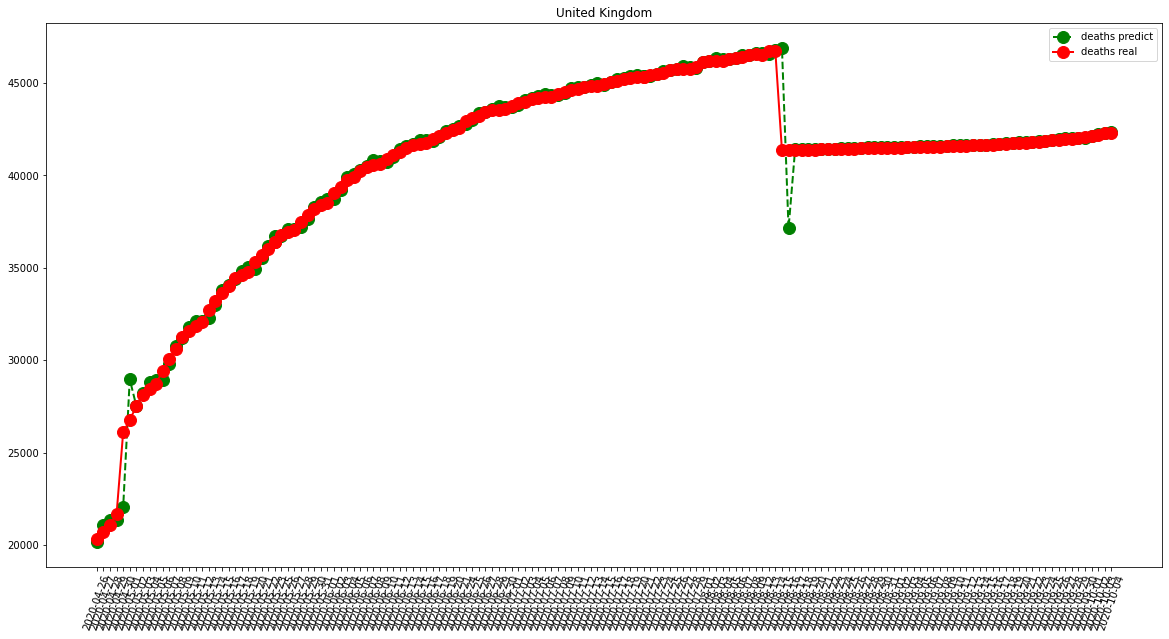

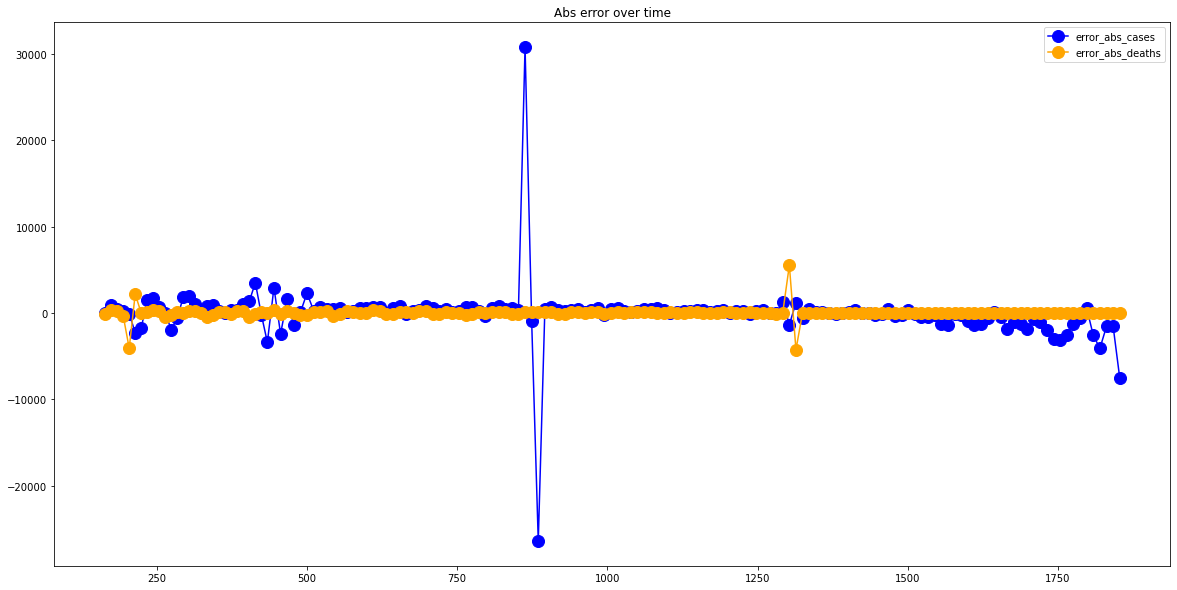

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  436.2420382165605
RMSE =  596.8427013804247
-- Germany performances for deaths --
MAE =  17.94904458598726
RMSE =  35.24617700730922


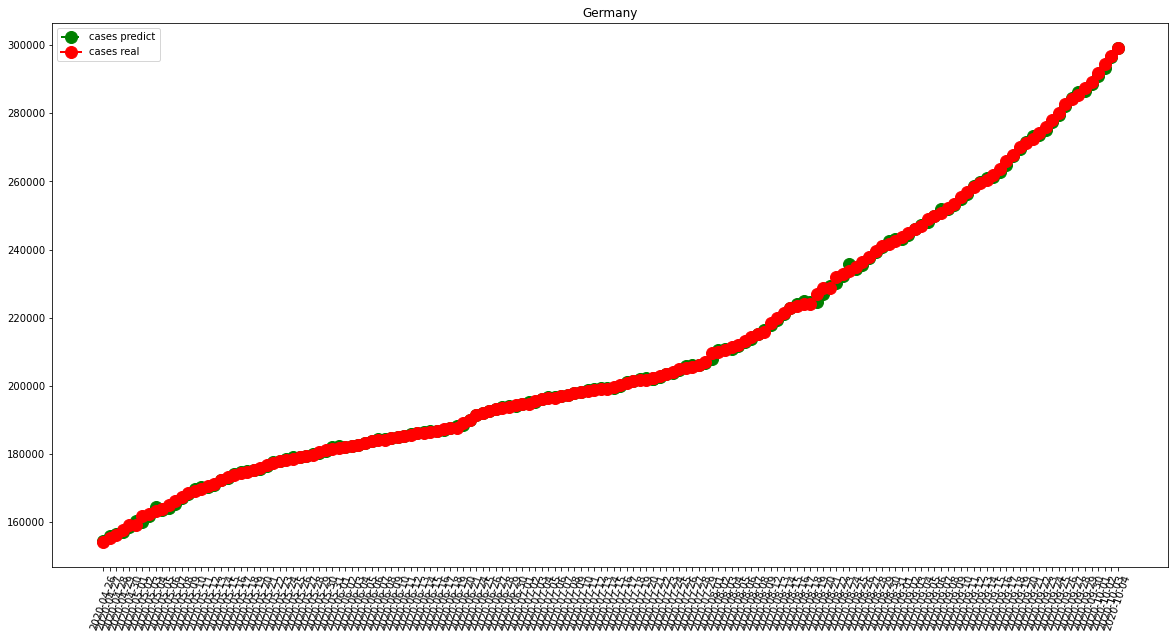

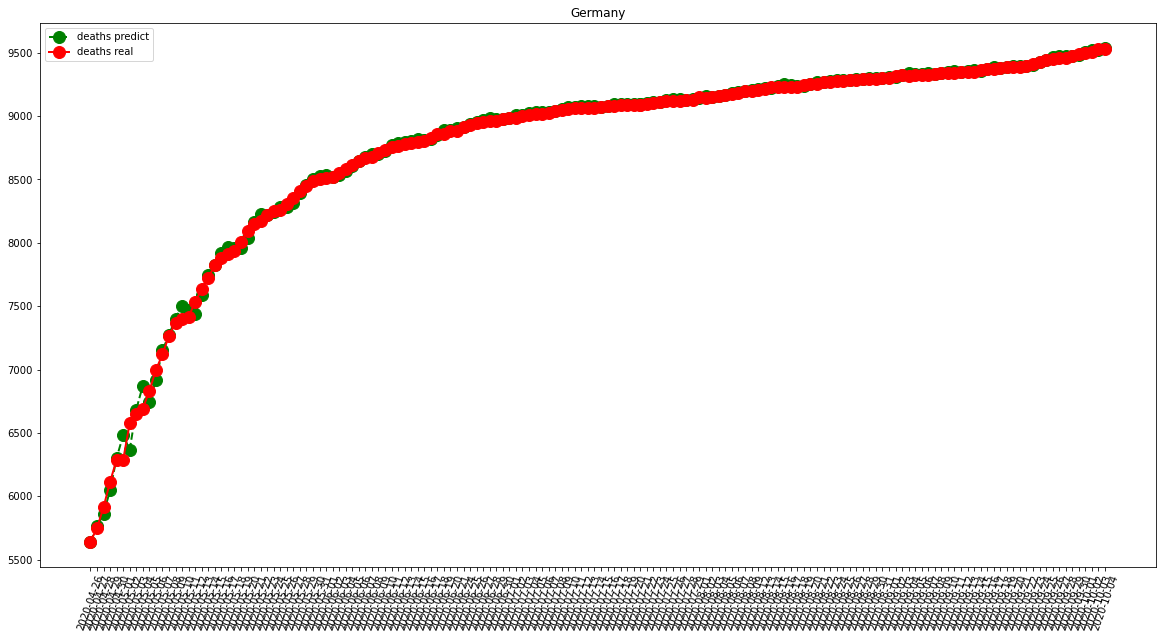

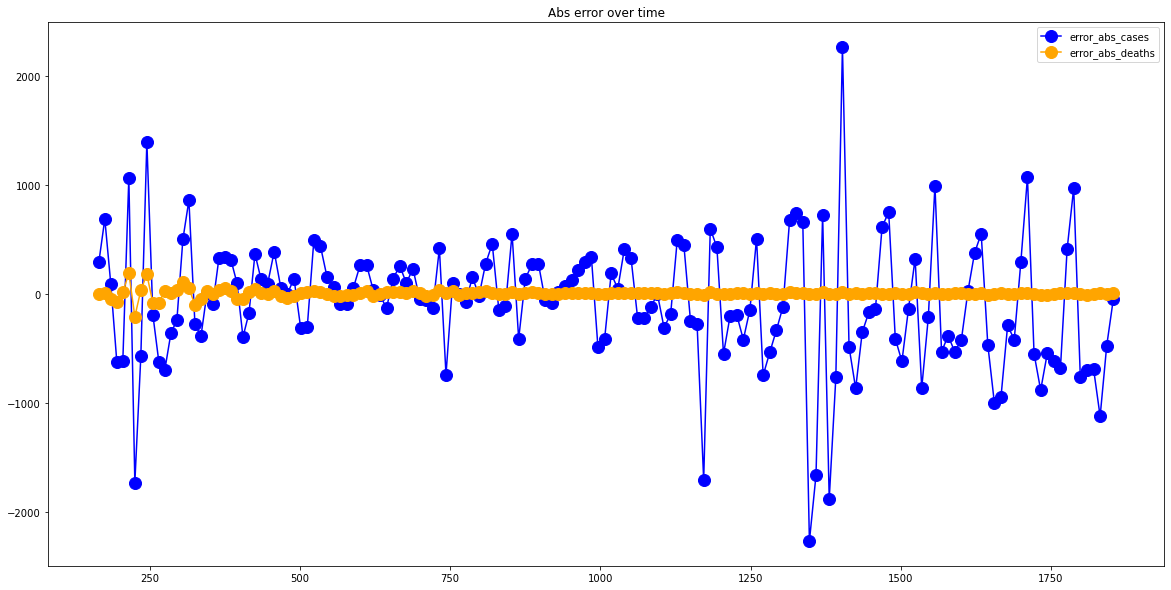

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  848.6496815286624
RMSE =  1191.2726321360838
-- Iran performances for deaths --
MAE =  49.45859872611465
RMSE =  82.08730011861964


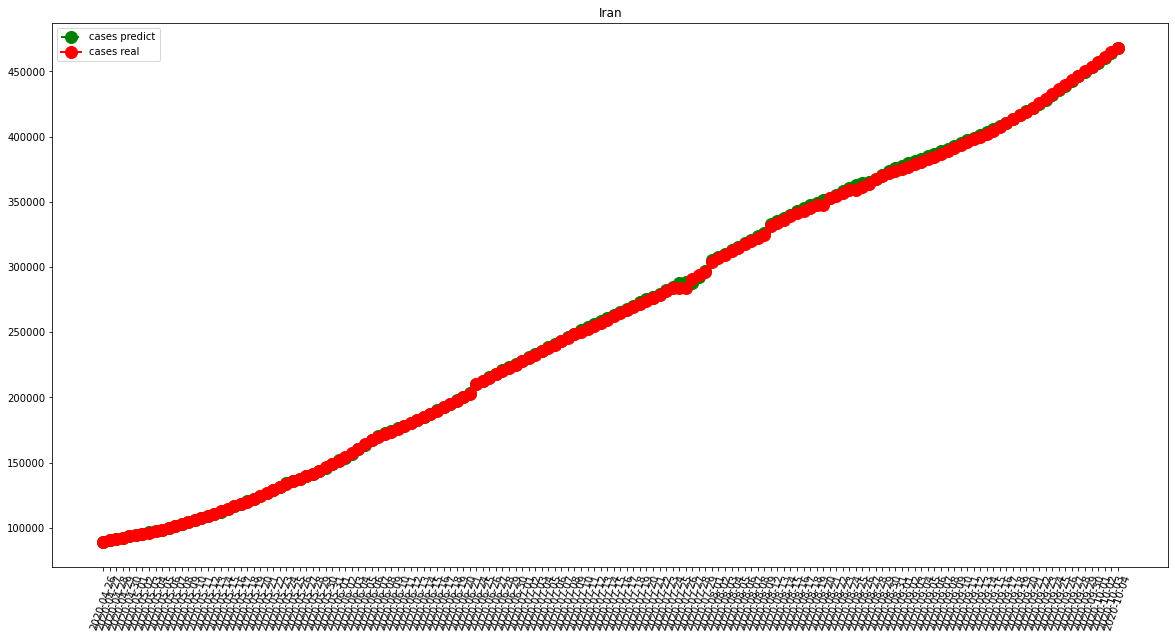

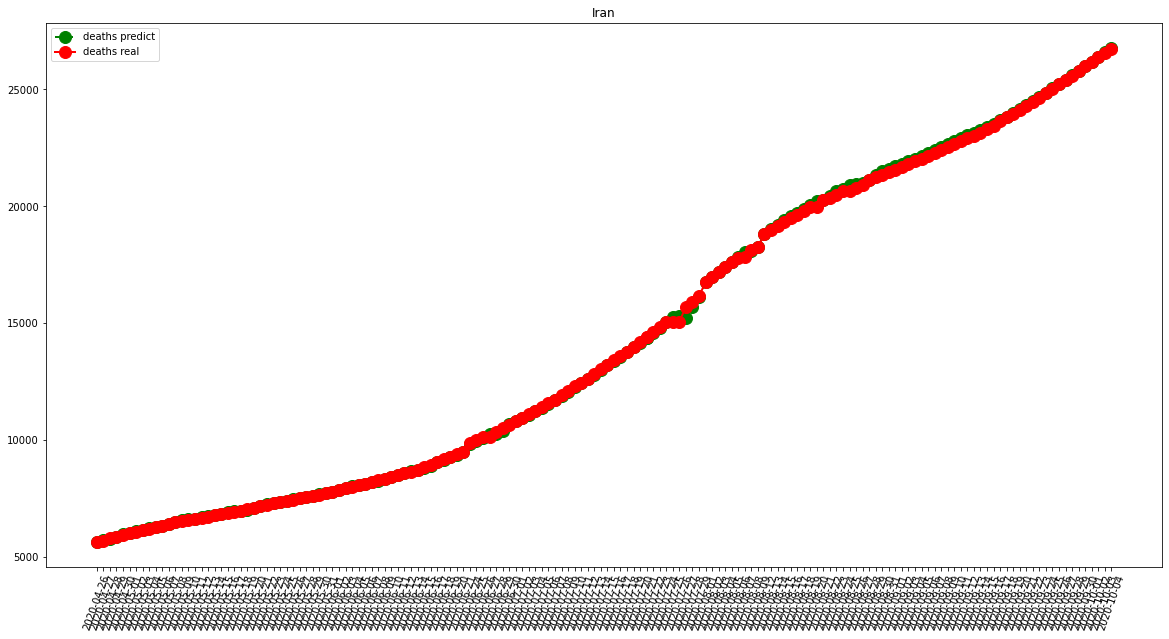

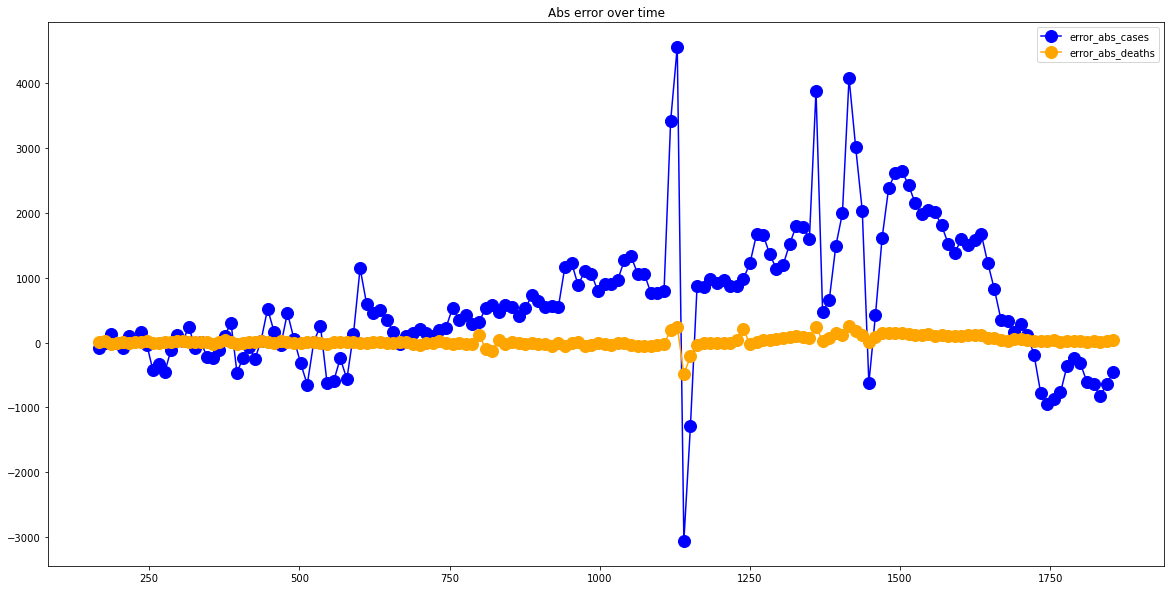

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  227.60509554140128
RMSE =  329.53020023397255
-- Turkey performances for deaths --
MAE =  15.566878980891719
RMSE =  81.30402172736959


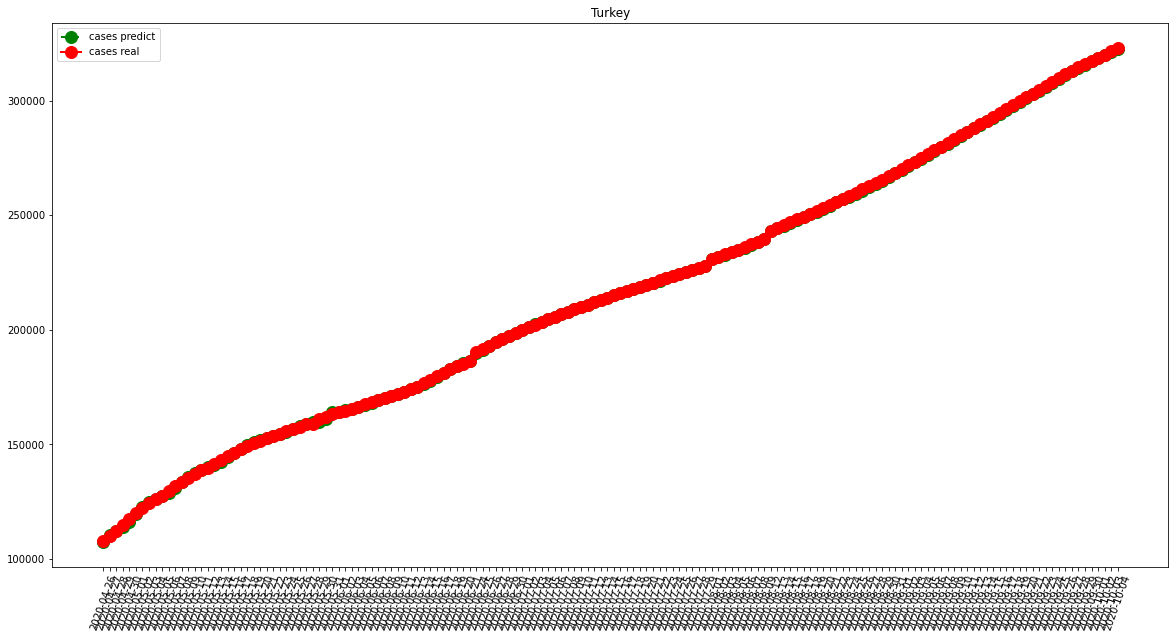

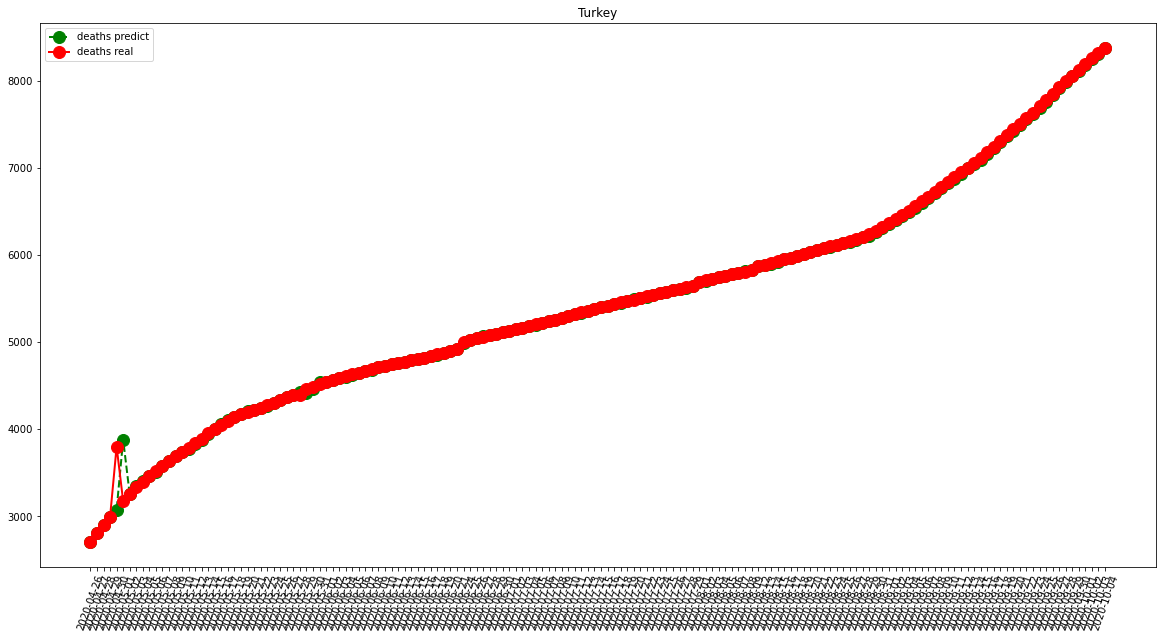

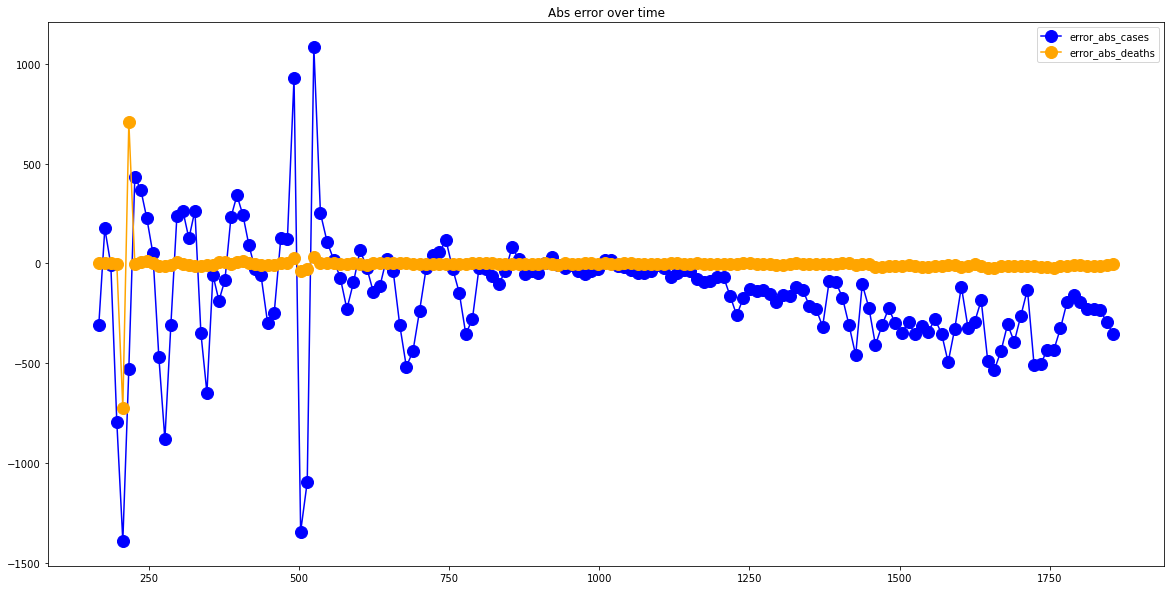

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  17464.323076923076
RMSE =  22451.23300811373
-- Brazil performances for deaths --
MAE =  512.4538461538461
RMSE =  614.8740646543936


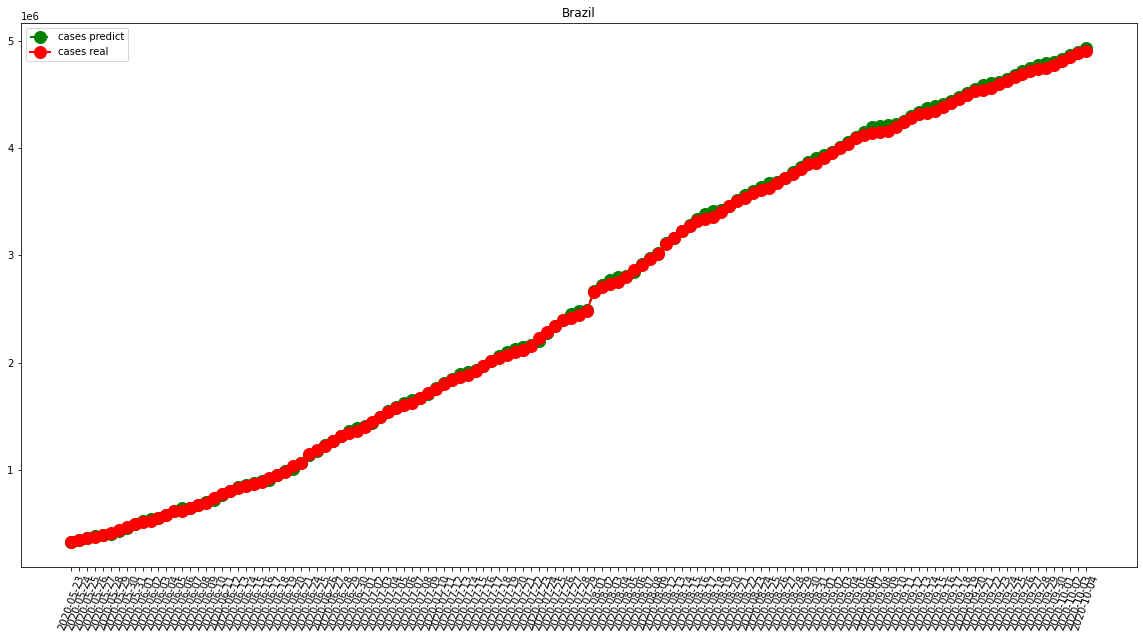

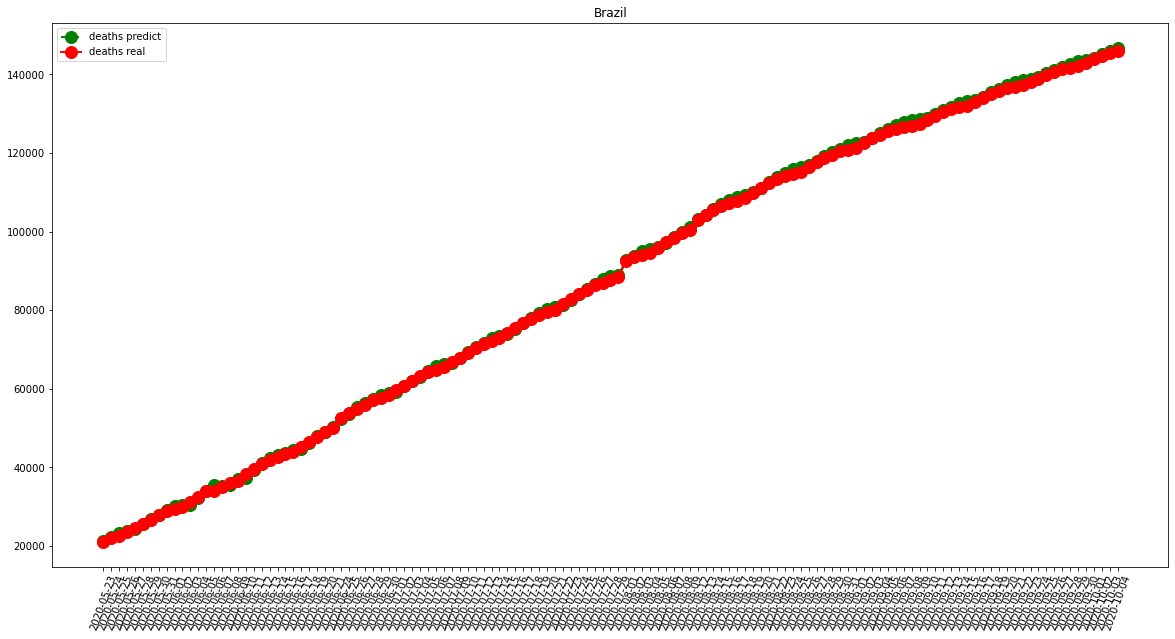

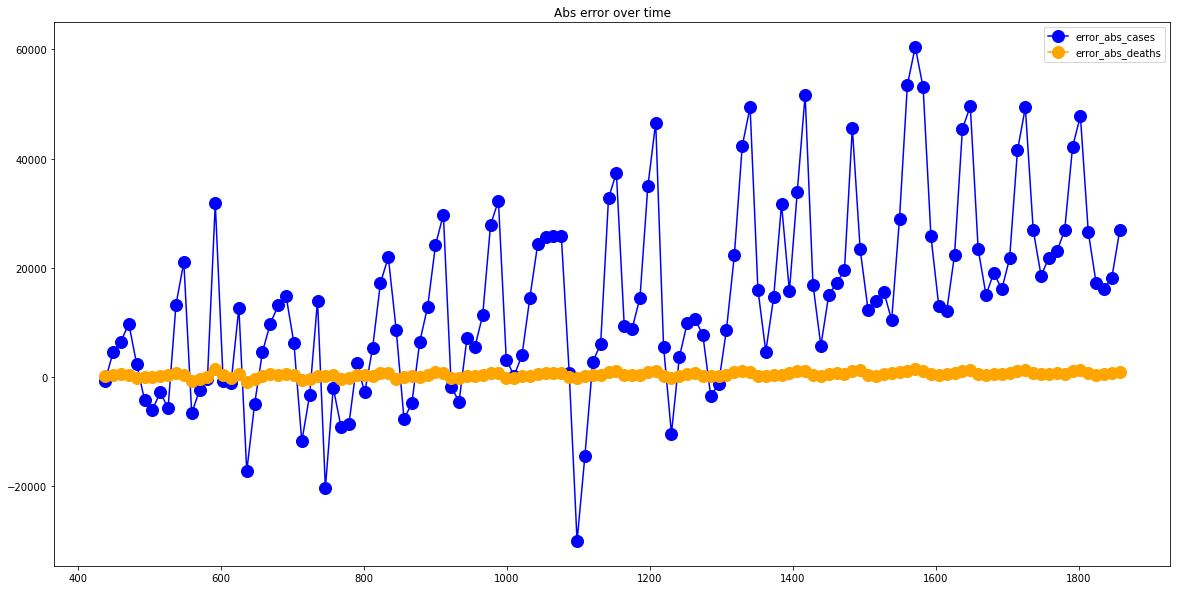

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)